# Titanic Project :
## By Sanya Jolly

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic=pd.read_csv("CSV/titanic.csv")

# Summary of data

## Brief explanation of variables

In [3]:
fields=titanic.columns
print(f'{fields[0]}\t:Represents unique passenger id of each passenger.')
print(f'{fields[1]}\t:Represents if a passenger has survived or not (0:Dead, 1:Alive).')
print(f'{fields[2]}\t\t:Represents the passenger class(There are total 3 passenger class).')
print(f'{fields[3]}\t\t:Represents the name of the passenger.')
print(f'{fields[4]}\t\t:Represents the sex of the passenger.')
print(f'{fields[5]}\t\t:Represents the age of the passenger.')
print(f'{fields[6]}\t\t:Represents if a passenger has a sibling or not.')
print(f'{fields[7]}\t\t:Represents the number of parent/sibling.')
print(f'{fields[8]}\t\t:Represents the ticket number.')
print(f'{fields[9]}\t\t:Represents the ticket fare.')
print(f'{fields[10]}\t\t:Represents the cabin number.')
print(f'{fields[11]}\t:Represents where the passenger has embarked from.')


PassengerId	:Represents unique passenger id of each passenger.
Survived	:Represents if a passenger has survived or not (0:Dead, 1:Alive).
Pclass		:Represents the passenger class(There are total 3 passenger class).
Name		:Represents the name of the passenger.
Sex		:Represents the sex of the passenger.
Age		:Represents the age of the passenger.
SibSp		:Represents if a passenger has a sibling or not.
Parch		:Represents the number of parent/sibling.
Ticket		:Represents the ticket number.
Fare		:Represents the ticket fare.
Cabin		:Represents the cabin number.
Embarked	:Represents where the passenger has embarked from.


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ageGroup
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,25.252101
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,14.970969
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,20.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


# passengers on titanic 

## no. of female and male

C:\Users\Win_10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


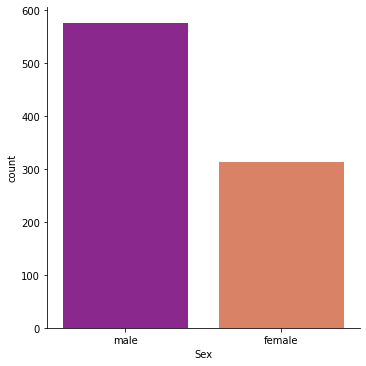

In [5]:
sns.catplot("Sex",data=titanic,kind="count",palette="plasma")

C:\Users\Win_10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


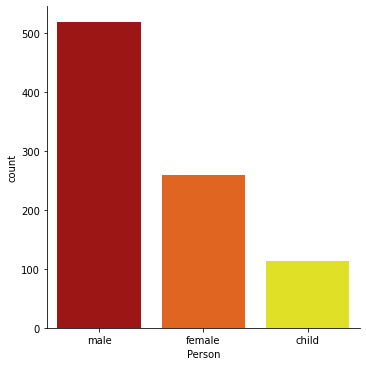

In [6]:
# column for person 
def male_female_child(passenger):
    Age, Sex = passenger
    if(Age < 18):
        return 'child'
    else:
        return Sex

titanic['Person'] = titanic[['Age','Sex']].apply(male_female_child, axis = 1)

sns.catplot('Person',data = titanic,kind='count',palette='hot')

## Place of highest embarkation of passengers

C:\Users\Win_10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


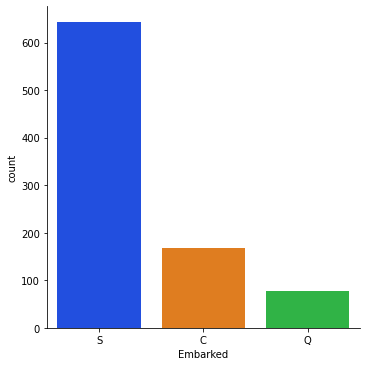

In [51]:
sns.catplot('Embarked',data=titanic,kind='count',palette='bright')

### Highest place of embarkation was South Hamptons followed by Cherbourg and Queenstown.

# unusual pattern 

## a) 15 people travelled with 0 fare 

In [7]:
print(titanic[titanic.Fare==0].count()["Fare"])

15


## b) 3 passengers paid the highest fare of 512.3292

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
88   female  23.0      3      2     19950  263.0000  C23 C25 C27        S   
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S   

     Person  
258  female  
737    male  
679    male  
88   female  
27     male  


<AxesSubplot:>

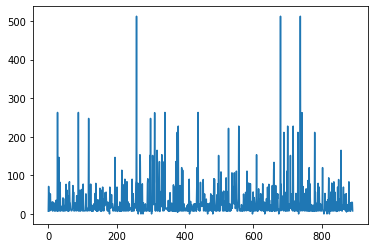

In [8]:
data=titanic
print(data.sort_values("Fare",ascending=False).head())
titanic["Fare"].plot() # x-axis=no. of passengers , y-axis=fare of the ticket

## c) no passengers with more than 6 family members on board

C:\Users\Win_10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


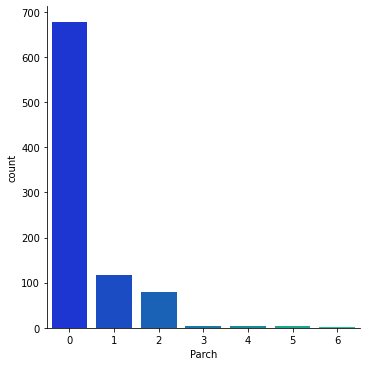

In [9]:
sns.catplot("Parch",data=titanic,kind="count",palette="winter")

## d) passengers sharing the same ticket number

In [10]:
print(titanic.groupby(["Ticket","Name"]).count())

                                                                PassengerId  \
Ticket      Name                                                              
110152      Cherry, Miss. Gladys                                          1   
            Maioni, Miss. Roberta                                         1   
            Rothes, the Countess. of (Lucy Noel Martha Dyer...            1   
110413      Taussig, Miss. Ruth                                           1   
            Taussig, Mr. Emil                                             1   
...                                                                     ...   
W./C. 6609  Harknett, Miss. Alice Phoebe                                  1   
W.E.P. 5734 Chaffee, Mr. Herbert Fuller                                   1   
W/C 14208   Harris, Mr. Walter                                            1   
WE/P 5735   Crosby, Capt. Edward Gifford                                  1   
            Crosby, Miss. Harriet R                 

# Survival Analysis

In [11]:
def deck(passenger):
    Cabin=passenger
    char = str(Cabin[0])[0]
    if(char!='n'):
        return char

In [12]:
titanic["Deck"]=titanic[["Cabin"]].apply(deck, axis = 1)

## a) Deck Survival Rate

In [13]:
titanic.groupby(['Deck','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Deck Pclass                                                                
A    1                15        15    15   15   12     15     15      15   
B    1                47        47    47   47   45     47     47      47   
C    1                59        59    59   59   51     59     59      59   
D    1                29        29    29   29   27     29     29      29   
     2                 4         4     4    4    4      4      4       4   
E    1                25        25    25   25   24     25     25      25   
     2                 4         4     4    4    3      4      4       4   
     3                 3         3     3    3    3      3      3       3   
F    2                 8         8     8    8    8      8      8       8   
     3                 5         5     5    5    3      5      5       5   
G    3                 4         4     4    4    4      4      4       4   
T    1                 1         1     1    1    1      1      1       1   

             Fare  Cabin  Embarked  Person  
Deck Pclass                                 
A    1         15     15        15      15  
B    1         47     47        45      47  
C    1         59     59        59      59  
D    1         29     29        29      29  
     2          4      4         4       4  
E    1         25     25        25      25  
     2          4      4         4       4  
     3          3      3         3       3  
F    2          8      8         8       8  
     3          5      5         5       5  
G    3          4      4         4       4  
T    1          1      1         1       1

<AxesSubplot:xlabel='Pclass', ylabel='Deck'>

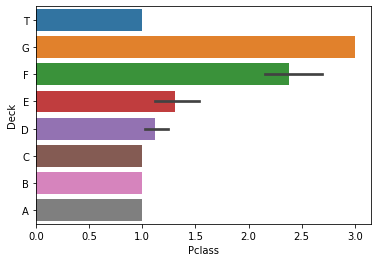

In [14]:
titanic=titanic.sort_values('Deck',ascending=False)
sns.barplot(x='Pclass',y='Deck', data = titanic)

#### Thus, we can clearly see that deck 'G' had highest passengers from Pclass 3. 

In [15]:
titanic1=titanic[titanic.Deck != None]

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

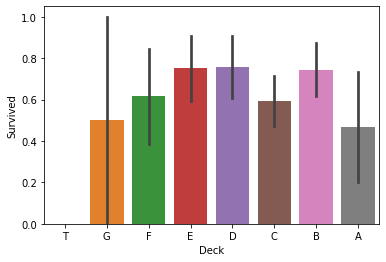

In [16]:
sns.barplot(x='Deck',y='Survived', data = titanic1)

### we can clearly see that passengers from deck 'E','D' and 'B' had the highest survival rate.

## b) Male_Female_Child Survival Rate 

<AxesSubplot:xlabel='Person', ylabel='Survived'>

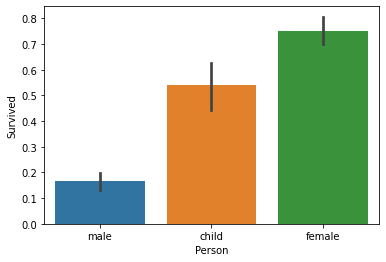

In [17]:
sns.barplot(x='Person',y='Survived', data=titanic)

### Clearly , we can see that females and children had the highest survival rate.

## c) Pclass Survival Rate

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

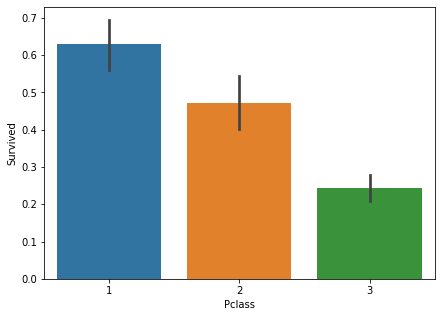

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(x='Pclass',y='Survived', data = titanic)

### we can see that Pclass 1 had the highest survival rate.

## Age Survival Rate 

In [30]:
def ageGroup(passengers):
    Age =passengers
    return Age - Age%10
titanic['ageGroup']=titanic[['Age']].apply(ageGroup, axis=1)

<AxesSubplot:xlabel='ageGroup', ylabel='Survived'>

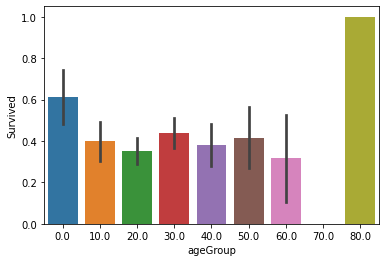

In [32]:
sns.barplot(x = 'ageGroup', y = 'Survived', data = titanic)

### Hence, passengers under the ageGroup 80-90 had the highest survival rate.

## Family Survival Rate

In [42]:
def Family(passenger):
    SibSp,Parch=passenger
    if Parch==0 and SibSp==0:
        return 'without family'
    return 'with family'
titanic['Family']=titanic[['SibSp','Parch']].apply(Family,axis=1)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

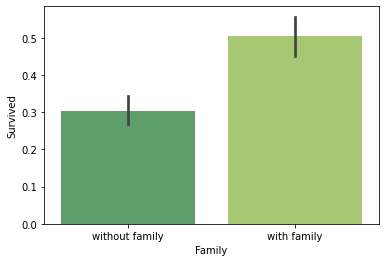

In [46]:
sns.barplot(x='Family', y ='Survived',data=titanic`,palette='summer')

### Therefore, passengers with family had more survival rate than passengers with family.

## Correlation 

<AxesSubplot:>

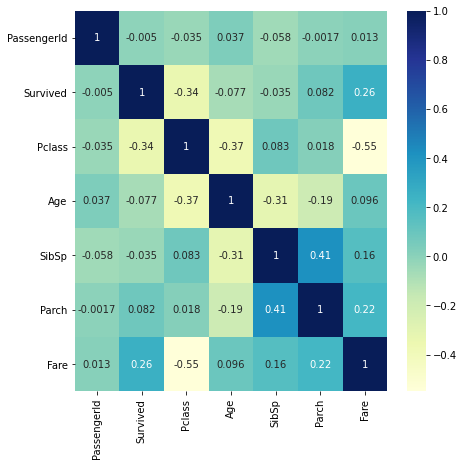

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(),cmap='YlGnBu', annot=True)